In [1]:
import pandas as pd
import nltk
from wordcloud import WordCloud
from collections import defaultdict

In [2]:
f_audience = pd.read_csv('dataset/f_audience.csv', index_col=1)
f_critics = pd.read_csv('dataset/f_critics.csv', index_col=1)

In [3]:
r_audience = pd.read_csv('dataset/audience_reviews_clean_v2.csv', index_col=0)
r_critics = pd.read_csv('dataset/critics_reviews_clean_v2.csv', index_col=0)

In [4]:
ra_fa = r_audience.loc[f_audience.index.intersection(r_audience.index)]
ra_fc = r_audience.loc[f_critics.index.intersection(r_audience.index)]
rc_fa = r_critics.loc[f_audience.index.intersection(r_critics.index)]
rc_fc = r_critics.loc[f_critics.index.intersection(r_critics.index)]

# Preprocesar corpus

In [5]:
stopwords = nltk.corpus.stopwords.words('english')

def get_tokens(corpus):
    tokens = []
    for text in corpus:
        ttokens = nltk.tokenize.word_tokenize(text)
        ttokens = [token for token in ttokens 
                   if token not in stopwords 
                   and token.isalpha()]
        tokens.append(ttokens)
    return tokens

In [6]:
t_ra_fa = get_tokens(ra_fa.review_content.values)
t_ra_fc = get_tokens(ra_fc.review_content.values)
t_rc_fa = get_tokens(rc_fa.review_content.values)
t_rc_fc = get_tokens(rc_fc.review_content.values)

# Conteo palabras

In [7]:
def sort_dict(d):
    return {k: v for k, v in sorted(d.items(), key=lambda item: item[1], reverse=True)}

In [8]:
def get_word_count(tokens_list):
    wc = defaultdict(int)
    for tokens in tokens_list:
        for token in tokens:
            wc[token] += 1
    
    return sort_dict(wc)

In [9]:
get_word_count(t_ra_fa)

{'movie': 8734,
 'film': 3118,
 'great': 2711,
 'one': 2452,
 'good': 2363,
 'love': 2163,
 'story': 1852,
 'like': 1758,
 'really': 1504,
 'watch': 1464,
 'movies': 1269,
 'time': 1240,
 'see': 1136,
 'well': 1075,
 'best': 1056,
 'critics': 992,
 'loved': 917,
 'life': 896,
 'people': 890,
 'funny': 829,
 'would': 803,
 'ever': 754,
 'think': 715,
 'much': 701,
 'amazing': 701,
 'even': 684,
 'also': 672,
 'acting': 671,
 'de': 659,
 'seen': 625,
 'get': 620,
 'characters': 614,
 'e': 612,
 'still': 611,
 'made': 610,
 'many': 608,
 'way': 586,
 'cast': 562,
 'fun': 551,
 'know': 547,
 'first': 545,
 'favorite': 541,
 'could': 529,
 'better': 524,
 'action': 522,
 'make': 519,
 'comedy': 518,
 'classic': 504,
 'watching': 484,
 'times': 482,
 'must': 479,
 'character': 474,
 'never': 471,
 'every': 467,
 'plot': 467,
 'beautiful': 462,
 'real': 457,
 'end': 457,
 'enjoyed': 446,
 'makes': 443,
 'thought': 434,
 'man': 433,
 'little': 432,
 'true': 427,
 'que': 425,
 'feel': 418,
 'fa

In [10]:
get_word_count(t_ra_fc)

{'movie': 5258,
 'film': 4849,
 'like': 2317,
 'good': 2283,
 'one': 2261,
 'really': 1650,
 'story': 1647,
 'time': 1400,
 'would': 1307,
 'much': 1229,
 'could': 1122,
 'even': 1097,
 'well': 1049,
 'watch': 1046,
 'characters': 1014,
 'get': 1012,
 'great': 1010,
 'bad': 957,
 'interesting': 937,
 'little': 918,
 'horror': 914,
 'way': 884,
 'make': 883,
 'plot': 859,
 'character': 851,
 'acting': 844,
 'see': 830,
 'also': 816,
 'think': 779,
 'first': 777,
 'people': 773,
 'end': 765,
 'made': 730,
 'never': 715,
 'better': 713,
 'still': 685,
 'pretty': 684,
 'something': 683,
 'boring': 677,
 'life': 667,
 'slow': 664,
 'ending': 660,
 'movies': 644,
 'know': 636,
 'films': 629,
 'de': 625,
 'nothing': 614,
 'bit': 606,
 'two': 601,
 'watching': 593,
 'enough': 586,
 'lot': 580,
 'though': 559,
 'scenes': 556,
 'love': 548,
 'going': 538,
 'feel': 525,
 'say': 521,
 'seen': 515,
 'ever': 513,
 'quite': 511,
 'many': 492,
 'back': 485,
 'minutes': 477,
 'go': 475,
 'director': 46

In [11]:
get_word_count(t_rc_fa)

{'movie': 1502,
 'film': 1434,
 'like': 809,
 'one': 736,
 'story': 521,
 'even': 516,
 'much': 501,
 'good': 412,
 'would': 361,
 'bad': 348,
 'comedy': 342,
 'make': 336,
 'little': 319,
 'characters': 296,
 'plot': 290,
 'time': 284,
 'never': 280,
 'could': 270,
 'way': 262,
 'full': 257,
 'drama': 254,
 'better': 254,
 'enough': 253,
 'get': 252,
 'really': 244,
 'may': 215,
 'feels': 214,
 'script': 214,
 'movies': 212,
 'made': 209,
 'nothing': 206,
 'two': 206,
 'action': 204,
 'many': 200,
 'review': 198,
 'director': 195,
 'ca': 190,
 'something': 188,
 'well': 186,
 'audience': 186,
 'hard': 184,
 'might': 183,
 'makes': 182,
 'every': 178,
 'people': 176,
 'seems': 172,
 'love': 171,
 'first': 170,
 'without': 168,
 'life': 168,
 'funny': 166,
 'real': 162,
 'us': 161,
 'cast': 160,
 'perry': 160,
 'long': 158,
 'another': 156,
 'spanish': 155,
 'far': 155,
 'character': 155,
 'kind': 154,
 'see': 154,
 'best': 154,
 'end': 151,
 'thing': 149,
 'work': 144,
 'still': 144,
 

In [12]:
get_word_count(t_rc_fc)

{'film': 2207,
 'movie': 847,
 'one': 831,
 'like': 612,
 'horror': 605,
 'story': 555,
 'full': 419,
 'much': 406,
 'life': 387,
 'time': 385,
 'even': 383,
 'comedy': 353,
 'good': 351,
 'little': 338,
 'way': 335,
 'performances': 330,
 'us': 327,
 'director': 321,
 'review': 319,
 'make': 317,
 'spanish': 313,
 'makes': 310,
 'work': 306,
 'characters': 301,
 'thriller': 290,
 'films': 289,
 'well': 287,
 'may': 287,
 'great': 283,
 'genre': 281,
 'best': 280,
 'drama': 276,
 'new': 270,
 'something': 270,
 'also': 269,
 'performance': 266,
 'still': 254,
 'never': 249,
 'first': 246,
 'see': 246,
 'world': 241,
 'fun': 238,
 'love': 229,
 'enough': 228,
 'two': 220,
 'character': 218,
 'look': 217,
 'many': 209,
 'funny': 208,
 'documentary': 206,
 'feature': 206,
 'sense': 204,
 'people': 203,
 'could': 202,
 'though': 195,
 'tale': 195,
 'cinema': 195,
 'watch': 192,
 'debut': 189,
 'really': 187,
 'would': 187,
 'real': 184,
 'moments': 182,
 'made': 179,
 'family': 179,
 'migh

# Conteo noun phrases

In [14]:
from textblob import TextBlob

In [15]:
def get_noun_phrases(corpus):
    noun_phrases = defaultdict(int)
    for text in corpus:
        for w in TextBlob(text).noun_phrases:
            noun_phrases[w] += 1
    return sort_dict(noun_phrases)

In [16]:
get_noun_phrases(ra_fc.review_content.values)

{"i 'm": 442,
 "ca n't": 150,
 "i 've": 146,
 'good movie': 129,
 "i ca n't": 122,
 "i 'd": 110,
 'main character': 98,
 'i guess': 92,
 '’ s': 90,
 "i 'll": 76,
 'main characters': 70,
 "n't waste": 60,
 'movie i': 59,
 'horror movie': 58,
 'character development': 55,
 'horror film': 53,
 'low budget': 52,
 "wo n't": 52,
 'special effects': 50,
 "n't work": 49,
 'entire movie': 49,
 'good film': 47,
 'bad movie': 46,
 'good job': 44,
 'whole thing': 43,
 'good performances': 42,
 'whole movie': 41,
 'rotten tomatoes': 39,
 'entire film': 38,
 'great movie': 38,
 "n't care": 38,
 "film 's": 37,
 'real life': 35,
 'great job': 33,
 'true story': 33,
 'slow pace': 31,
 "movie i 've": 31,
 'great performances': 29,
 'story line': 29,
 'slow burn': 29,
 "hitchcock 's": 29,
 'new york': 28,
 'i hope': 28,
 'great cast': 28,
 'character study': 28,
 'complete waste': 28,
 'long time': 27,
 'time i': 27,
 'gon na': 27,
 'film i': 27,
 "n't bother": 26,
 'i suppose': 26,
 'good thing': 25,
 '

# n-grams

In [17]:
def get_ngrams(corpus):
    ngrams = defaultdict(int)
    for text in corpus:
        for w in TextBlob(text).ngrams(3):
            ngrams[' '.join(w)] += 1
    return sort_dict(ngrams)

In [18]:
get_ngrams(ra_fc.review_content.values)

{"it 's a": 420,
 'one of the': 355,
 'a lot of': 349,
 "i do n't": 325,
 'of the film': 322,
 "it 's not": 308,
 'this is a': 273,
 "but it 's": 260,
 'this movie is': 259,
 'of the movie': 241,
 'the film is': 226,
 "i did n't": 200,
 'the movie is': 194,
 'could have been': 193,
 'some of the': 186,
 'to be a': 184,
 'this movie was': 171,
 'at the end': 164,
 'this film is': 163,
 'it was a': 150,
 'the acting is': 141,
 "i ca n't": 140,
 'it is a': 140,
 'in this movie': 136,
 'most of the': 135,
 "if you 're": 133,
 "i 'm not": 133,
 'waste of time': 132,
 'in the end': 127,
 "do n't know": 127,
 'the story is': 125,
 "and it 's": 124,
 "it does n't": 122,
 "it 's just": 121,
 'but it was': 120,
 'in the film': 119,
 "i 've ever": 110,
 "there 's a": 110,
 'is one of': 108,
 'but it is': 104,
 'the fact that': 103,
 'the movie was': 102,
 'one of those': 101,
 'the rest of': 100,
 "i 've seen": 99,
 'a bit of': 99,
 'in this film': 98,
 'there is a': 98,
 "that it 's": 98,
 'of t

# Adjectives

In [19]:
def get_adjectives(corpus):
    adjectives = defaultdict(int)
    for text in corpus:
        for word, tag in TextBlob(text).tags:
            if tag in 'JJ':
                adjectives[word] += 1
    return sort_dict(adjectives)

In [20]:
get_adjectives(ra_fa.review_content.values)

{'great': 2711,
 'good': 2346,
 'i': 1594,
 'funny': 664,
 'many': 608,
 'favorite': 505,
 'other': 491,
 'real': 457,
 'amazing': 450,
 'much': 437,
 'true': 427,
 'beautiful': 420,
 'little': 416,
 'first': 413,
 'classic': 410,
 'bad': 402,
 'such': 366,
 'hilarious': 344,
 'excellent': 329,
 'awesome': 308,
 'perfect': 303,
 'wonderful': 275,
 'new': 256,
 'fantastic': 244,
 'own': 241,
 'different': 241,
 'old': 238,
 'same': 236,
 'young': 222,
 'u': 219,
 'whole': 218,
 'sure': 216,
 'sad': 215,
 'few': 215,
 'nice': 213,
 'romantic': 209,
 'original': 205,
 'hard': 202,
 'low': 199,
 'interesting': 193,
 'wrong': 192,
 'big': 192,
 'n': 190,
 'main': 180,
 'enjoyable': 179,
 'underrated': 179,
 'worth': 176,
 'top': 174,
 'emotional': 168,
 'powerful': 161,
 'full': 160,
 'brilliant': 160,
 'overall': 156,
 'un': 153,
 'incredible': 150,
 'entertaining': 147,
 'strong': 143,
 'only': 139,
 'last': 137,
 'human': 135,
 'important': 131,
 'high': 130,
 'american': 129,
 'happy': 

# Sentiment

In [21]:
def get_mean_sentiment(corpus):
    polarity = 0.
    subjectivity = 0.
    for text in corpus:
        sentiment = TextBlob(text).sentiment
        polarity += sentiment.polarity
        subjectivity += sentiment.subjectivity
    
    return polarity / len(corpus), subjectivity / len(corpus)

In [22]:
get_mean_sentiment(ra_fa.review_content.values)

(0.3331097013994074, 0.5723939165017063)

In [23]:
get_mean_sentiment(ra_fc.review_content.values)

(0.04216075698358505, 0.5254415846264174)

In [24]:
get_mean_sentiment(rc_fa.review_content.values)

(0.01878512329393482, 0.4753409136208455)

In [25]:
get_mean_sentiment(rc_fc.review_content.values)

(0.15234960268709424, 0.5165481225153987)

In [259]:
import numpy as np
ra = np.append(ra_fa.review_content.values, ra_fc.review_content.values)
rc = np.append(rc_fa.review_content.values, rc_fc.review_content.values)

ra_sub = [TextBlob(text).sentiment[1] for text in ra]
rc_sub = [TextBlob(text).sentiment[1] for text in rc]

<Axes: ylabel='Count'>

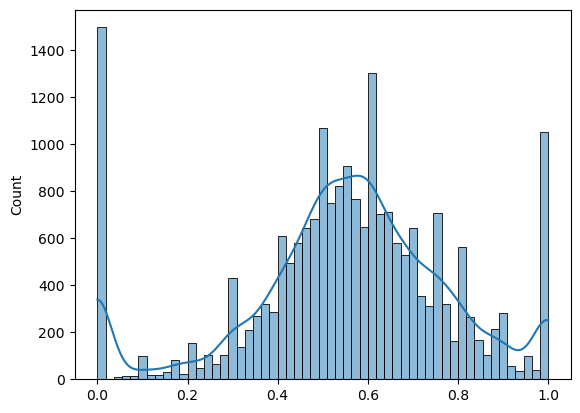

In [262]:
sns.histplot(ra_sub, kde=True)

<Axes: ylabel='Count'>

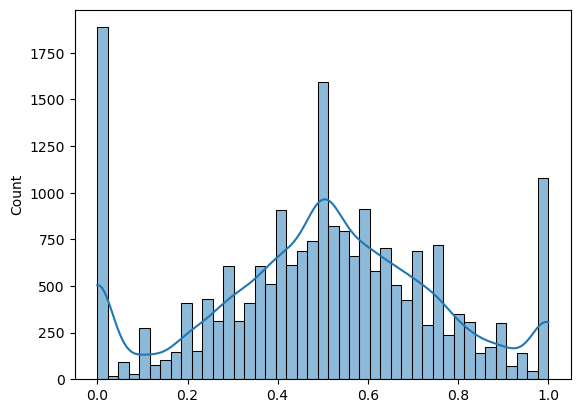

In [263]:
sns.histplot(rc_sub, kde=True)

# Bigramas lematizados

In [26]:
import nltk
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

def get_lemmatized_bigrams_text(tokens):
    lemmatizer = WordNetLemmatizer()
    #tokens = nltk.tokenize.word_tokenize(text)
    pos_tags = pos_tag(tokens)
    lemmatized_words = []
    for word, tag in pos_tags:
        wntag = get_wordnet_pos(tag)
        if wntag is None:  # if there is no available POS tag, keep the original word
            lemmatized_words.append(word)
        else:
            lemmatized_words.append(lemmatizer.lemmatize(word, pos=wntag))
    # Generate bigrams
    bigrams = list(ngrams(lemmatized_words, 2))
    return bigrams

In [27]:
def get_lemmatized_bigrams(corpus):
    bigrams = defaultdict(int)
    for text in corpus:
        for bigram in get_lemmatized_bigrams_text(text):
            bigrams[bigram] += 1
    return sort_dict(bigrams)

In [134]:
lemmatized_bigrams = get_lemmatized_bigrams(t_ra_fa + t_ra_fc + t_rc_fa + t_rc_fc)

In [195]:
lemmatized_bigrams

{('good', 'movie'): 673,
 ('great', 'movie'): 652,
 ('love', 'movie'): 650,
 ('feel', 'like'): 583,
 ('full', 'review'): 484,
 ('movie', 'ever'): 469,
 ('review', 'spanish'): 462,
 ('watch', 'movie'): 410,
 ('one', 'best'): 365,
 ('worth', 'watch'): 357,
 ('ever', 'see'): 357,
 ('movie', 'make'): 320,
 ('main', 'character'): 317,
 ('horror', 'film'): 313,
 ('movie', 'like'): 296,
 ('horror', 'movie'): 296,
 ('movie', 'watch'): 289,
 ('bad', 'movie'): 286,
 ('waste', 'time'): 282,
 ('really', 'good'): 275,
 ('movie', 'great'): 272,
 ('must', 'see'): 268,
 ('like', 'movie'): 265,
 ('see', 'movie'): 265,
 ('look', 'like'): 260,
 ('best', 'movie'): 257,
 ('love', 'story'): 255,
 ('make', 'movie'): 254,
 ('favorite', 'movie'): 253,
 ('one', 'favorite'): 245,
 ('movie', 'really'): 230,
 ('make', 'sense'): 230,
 ('well', 'do'): 223,
 ('movie', 'good'): 222,
 ('pretty', 'good'): 220,
 ('movie', 'one'): 219,
 ('even', 'though'): 212,
 ('good', 'film'): 209,
 ('seem', 'like'): 201,
 ('movie', 's

In [147]:
to_plot = {k: v for k, v in sorted(lemmatized_bigrams.items(), key=lambda item: item[1], reverse=True)[12:42]}

In [154]:
to_plot_keys = [' '.join(key) for key in to_plot.keys()]
to_plot_values = list(to_plot.values())

In [190]:
from colour import Color

def create_countplot(ax, x, y, color, xlabel, ylabel, title):
    assert len(color) <= 2

    colors = color[0]
    if len(color) > 1:
        colors = list(Color(color[0]).range_to(Color(color[1]),len(x)))
        colors = [color.hex for color in colors]

    ax.barh(y=range(len(x) - 1, -1,  -1), width=x, color=colors, edgecolor='white', alpha=1)

    # Add grid lines for better readability
    ax.grid(axis='x', linestyle='--', alpha=0.7)

    # Set labels and title
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_title(title)

    # Adjust tick font size
    ax.tick_params(axis='both', labelsize=10)
    ax.set_yticks(range(len(x) - 1, -1,  -1))
    ax.set_yticklabels(y)

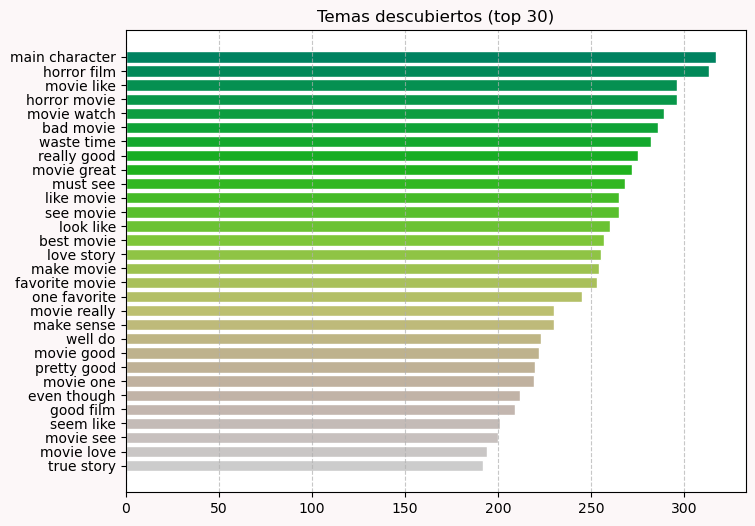

In [194]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
create_countplot(ax, to_plot_values, to_plot_keys, ['#008260', '#CCCCCC'], '', '', 'Temas descubiertos (top 30)')
fig.patch.set_facecolor('#FCF7F8')

In [11]:
get_lemmatized_bigrams(t_ra_fa)

{('love', 'movie'): 629,
 ('great', 'movie'): 580,
 ('good', 'movie'): 432,
 ('movie', 'ever'): 292,
 ('one', 'best'): 281,
 ('watch', 'movie'): 274,
 ('must', 'see'): 254,
 ('favorite', 'movie'): 246,
 ('best', 'movie'): 241,
 ('movie', 'great'): 228,
 ('one', 'favorite'): 226,
 ('see', 'movie'): 182,
 ('worth', 'watch'): 181,
 ('movie', 'watch'): 181,
 ('movie', 'make'): 175,
 ('really', 'good'): 174,
 ('n', 'n'): 168,
 ('movie', 'love'): 167,
 ('movie', 'like'): 159,
 ('love', 'story'): 159,
 ('movie', 'time'): 156,
 ('ever', 'see'): 154,
 ('movie', 'one'): 152,
 ('like', 'movie'): 150,
 ('movie', 'good'): 145,
 ('movie', 'really'): 142,
 ('highly', 'recommend'): 142,
 ('well', 'do'): 141,
 ('great', 'story'): 127,
 ('true', 'story'): 124,
 ('movie', 'see'): 123,
 ('really', 'enjoy'): 115,
 ('great', 'film'): 107,
 ('funny', 'movie'): 102,
 ('rotten', 'tomato'): 100,
 ('feel', 'like'): 100,
 ('main', 'character'): 99,
 ('great', 'cast'): 98,
 ('make', 'movie'): 96,
 ('good', 'film')

Temas: **True Story (Real Life)**, Funny Movie, Main Character, Great Cast, Action Movie.

In [12]:
get_lemmatized_bigrams(t_rc_fa)

{('full', 'review'): 162,
 ('review', 'spanish'): 154,
 ('feel', 'like'): 131,
 ('tyler', 'perry'): 60,
 ('look', 'like'): 53,
 ('play', 'like'): 52,
 ('bad', 'movie'): 49,
 ('romantic', 'comedy'): 47,
 ('good', 'movie'): 43,
 ('soap', 'opera'): 39,
 ('pretty', 'much'): 36,
 ('movie', 'like'): 36,
 ('make', 'movie'): 34,
 ('two', 'hour'): 34,
 ('adam', 'sandler'): 33,
 ('big', 'screen'): 33,
 ('movie', 'make'): 32,
 ('production', 'value'): 32,
 ('good', 'intention'): 31,
 ('seem', 'like'): 29,
 ('high', 'school'): 29,
 ('nicholas', 'spark'): 28,
 ('make', 'film'): 27,
 ('try', 'hard'): 27,
 ('plot', 'twist'): 27,
 ('fall', 'flat'): 26,
 ('love', 'story'): 26,
 ('bad', 'film'): 26,
 ('video', 'game'): 24,
 ('film', 'like'): 23,
 ('yet', 'another'): 23,
 ('come', 'across'): 23,
 ('waste', 'time'): 22,
 ('action', 'sequence'): 22,
 ('content', 'review'): 22,
 ('target', 'audience'): 22,
 ('subject', 'matter'): 21,
 ('film', 'make'): 21,
 ('make', 'sense'): 21,
 ('take', 'seriously'): 20,

Temas: Romantic Comedy, Soap Opera, Production Value, Good Intention, High School, Plot Twist, Action Sequence.

In [14]:
get_lemmatized_bigrams(t_rc_fc)

{('full', 'review'): 313,
 ('review', 'spanish'): 308,
 ('horror', 'film'): 127,
 ('feel', 'like'): 79,
 ('horror', 'movie'): 64,
 ('one', 'best'): 46,
 ('character', 'study'): 43,
 ('new', 'york'): 38,
 ('make', 'film'): 38,
 ('debut', 'feature'): 36,
 ('film', 'make'): 35,
 ('give', 'us'): 33,
 ('strong', 'performance'): 33,
 ('love', 'story'): 32,
 ('feature', 'debut'): 31,
 ('romantic', 'comedy'): 31,
 ('film', 'year'): 30,
 ('look', 'like'): 28,
 ('psychological', 'thriller'): 27,
 ('first', 'feature'): 26,
 ('show', 'us'): 25,
 ('best', 'film'): 25,
 ('star', 'war'): 25,
 ('lead', 'performance'): 24,
 ('special', 'effect'): 23,
 ('worth', 'see'): 23,
 ('central', 'performance'): 23,
 ('genre', 'fan'): 23,
 ('well', 'worth'): 23,
 ('tell', 'story'): 22,
 ('play', 'like'): 22,
 ('good', 'time'): 22,
 ('film', 'feel'): 21,
 ('first', 'film'): 21,
 ('subject', 'matter'): 21,
 ('big', 'screen'): 20,
 ('film', 'one'): 20,
 ('film', 'see'): 20,
 ('film', 'full'): 20,
 ('along', 'way'): 

Temas: **Horror Film**, Character Study, Strong Performance, Romantic Comedy, Psychological Thriller, Special Effect.

In [13]:
get_lemmatized_bigrams(t_ra_fc)

{('feel', 'like'): 273,
 ('waste', 'time'): 254,
 ('bad', 'movie'): 202,
 ('main', 'character'): 192,
 ('good', 'movie'): 189,
 ('horror', 'movie'): 187,
 ('ever', 'see'): 181,
 ('horror', 'film'): 164,
 ('movie', 'ever'): 159,
 ('make', 'sense'): 159,
 ('worth', 'watch'): 152,
 ('low', 'budget'): 142,
 ('watch', 'movie'): 125,
 ('pretty', 'good'): 125,
 ('felt', 'like'): 118,
 ('seem', 'like'): 107,
 ('movie', 'watch'): 106,
 ('look', 'like'): 106,
 ('make', 'movie'): 105,
 ('movie', 'make'): 99,
 ('like', 'movie'): 93,
 ('even', 'though'): 92,
 ('movie', 'like'): 90,
 ('good', 'film'): 85,
 ('really', 'good'): 83,
 ('one', 'bad'): 78,
 ('film', 'make'): 78,
 ('first', 'half'): 78,
 ('movie', 'really'): 77,
 ('make', 'film'): 75,
 ('get', 'good'): 74,
 ('take', 'place'): 73,
 ('movie', 'good'): 71,
 ('well', 'do'): 70,
 ('special', 'effect'): 70,
 ('bad', 'film'): 70,
 ('good', 'performance'): 68,
 ('slow', 'pace'): 67,
 ('watch', 'film'): 67,
 ('would', 'recommend'): 66,
 ('character

Temas: Main Character, Horror Movie, Low Budget, Special Effect, Slow Pace, Bad Acting, Ending.

In [28]:
from utils import Embeddings, LLM
e = Embeddings()
llm = LLM()

In [34]:
def get_corpus_for_topic(who, topic, max_n=50):
    if who == 'critics':
        c1 = e.rc_fc
        c2 = e.rc_fa
    else:
        c1 = e.ra_fa
        c2 = e.ra_fc
    
    return c1.query(topic, max_n)['documents'][0] + c2.query(topic, max_n)['documents'][0]

In [208]:
def analyze_topic_general(topic):
    docs = dict()
    docs['critics'] = get_corpus_for_topic('critics', topic, 25)
    docs['audience'] = get_corpus_for_topic('audience', topic, 25)
    
    sys_prompt = f"You are responsible of performing text mining of movie reviews. You will receive \
    reviews in a JSON. You will get two types of reviews: from certified critics, and from the general \
    audience. The reviews are from different movies, but they all are related to the topic \"{topic}\". \
    Your task is determine the similarities and differences in the opinions of each group."
    
    return llm.message(str(docs), sys_prompt)

In [200]:
def analyze_topic(who, topic):
    docs = get_corpus_for_topic(who, topic)
    
    sys_prompt = f"You are designated as an assistant that analyzes movie reviews. You will receive \
    reviews in a list of individual reviews. All the reviews are related to the topic {topic}. Please \
    note that not all the reviews are about the same movie. Your task is to gain insights from the \
    reviews: What do the reviewers value about the topic? What do the reviewers criticize about the topic?\
    Be concise, your answer must be in bullet points."

    return llm.message(str(docs), sys_prompt)

In [68]:
def wc_for_topic(topic):
    docs = get_corpus_for_topic('audience', topic, 100)
    docs += get_corpus_for_topic('critics', topic, 100)

    return get_word_count(get_tokens(docs))

In [243]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random

def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip('#')
    return tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))

def interpolate_color(color1, color2, factor):
    return tuple(int(color1[i] + (color2[i] - color1[i]) * factor) for i in range(3))

start_color = hex_to_rgb('#6610F2')
end_color = hex_to_rgb('#008260')
cmap = [interpolate_color(start_color, end_color, i/5) for i in range(5)]

def gradient_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return cmap[random.randint(0, 4)]
    #return [start_color, end_color, hex_to_rgb("#FA3209")][random.randint(0, 2)]


def create_word_cloud(word_frequencies, title):
    wordcloud = WordCloud(width=800, height=400, color_func=gradient_color_func, max_words=100, background_color='#FCF7F8').generate_from_frequencies(word_frequencies)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.gcf().patch.set_facecolor('#FCF7F8')
    
    plt.show()

# Topic #1: Horror movies 

In [211]:
wc_horror = wc_for_topic('horror')
wc_horror

{'horror': 336,
 'movie': 132,
 'film': 115,
 'good': 63,
 'one': 63,
 'like': 62,
 'great': 41,
 'story': 36,
 'really': 34,
 'genre': 33,
 'well': 31,
 'movies': 28,
 'scary': 26,
 'gore': 25,
 'time': 24,
 'films': 24,
 'thriller': 22,
 'fans': 20,
 'way': 20,
 'fun': 19,
 'much': 19,
 'creepy': 19,
 'best': 18,
 'made': 18,
 'would': 18,
 'love': 17,
 'pretty': 17,
 'watch': 17,
 'scares': 17,
 'plot': 17,
 'even': 17,
 'sense': 16,
 'dark': 16,
 'suspense': 16,
 'interesting': 16,
 'gory': 16,
 'zombie': 15,
 'house': 15,
 'seen': 15,
 'us': 15,
 'also': 15,
 'violence': 15,
 'make': 14,
 'new': 14,
 'scenes': 14,
 'something': 14,
 'still': 13,
 'get': 13,
 'enough': 13,
 'effects': 13,
 'got': 13,
 'feel': 13,
 'little': 13,
 'loved': 12,
 'rob': 12,
 'classic': 12,
 'see': 12,
 'part': 12,
 'think': 12,
 'torture': 12,
 'makes': 12,
 'disturbing': 12,
 'atmosphere': 12,
 'bad': 12,
 'comedy': 12,
 'psychological': 12,
 'family': 12,
 'slasher': 11,
 'ever': 11,
 'fan': 11,
 'wa

In [212]:
del wc_horror['horror']
del wc_horror['movie']
del wc_horror['film']
del wc_horror['one']
del wc_horror['good']

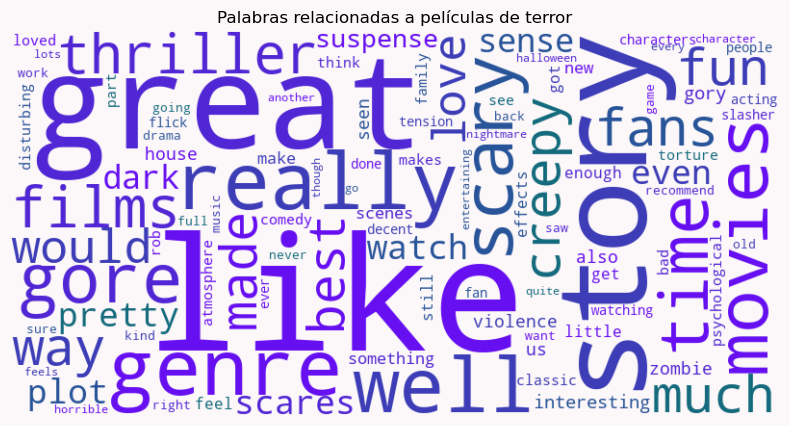

In [249]:
create_word_cloud(wc_horror, 'Palabras relacionadas a películas de terror')

In [201]:
print(analyze_topic('critics', 'horror'))

**What reviewers value about horror:**

- Skillful and expertly modulated horror inducing terror effectively.
- Reconstructing the formula of the genre and reflecting modern fears.
- Diversity and variety within the horror genre.
- Effective sound design and special effects.
- Reimagining classic horror tropes with originality.
- High production value and sophisticated storytelling.
- Twists in genre conventions to deliver something new and exciting.
- Unique storytelling techniques, like found footage or psychological horror.
- Homage to traditional horror while injecting fresh elements.
- Creating tension and suspense through atmospheric settings.

**What reviewers criticize about horror:**

- Over-reliance on jump scares rather than storytelling.
- Gratuitous violence and gore for shock value.
- Lack of originality or innovative storytelling.
- Inconsistent quality and lack of coherence in the narrative.
- Misleading marketing that over-hypes the horror elements.
- Tendency towards 

In [203]:
print(analyze_topic('audience', 'horror'))

- **Positive Aspects:**
    - Reviewers appreciate horror movies with a sense of impending dread.
    - Mention of simple concepts executed well in horror films.
    - Praise for the atmosphere, suspense, and scares in horror movies.
    - Positive comments on the creativity and uniqueness of certain horror films.
    - Recognition of nostalgia and references to classic horror films.
    - Acknowledgment of well-made horror movies with good acting, special effects, and music.
    - Enjoyment of psychological thrillers in the horror genre.
    - Appreciation for twists, interesting plot points, and humor incorporated into horror movies.
    - Positive remarks on action, suspense, and eerie music in horror films.
    - Mention of memorable villains and characters in horror movies.  

- **Negative Aspects:**
    - Criticism of jump scares being overused in horror movies.
    - Critiques about some horror films lacking depth, emotional impact, or strong character performances.
    - Disapp

In [272]:
e.rc_fc.query('horror movie tropes')

{'ids': [['m/relic_2020/36',
   'm/backcountry/25',
   'm/always_shine/30',
   'm/the_wind_2019/15',
   'm/cult_of_chucky/10',
   'm/open_water/18',
   'm/she_dies_tomorrow/6',
   'm/antibirth/6',
   'm/antibirth/5',
   'm/mother_may_i_sleep_with_danger_2016/4']],
 'distances': None,
 'metadatas': None,
 'embeddings': None,
 'documents': [['few horror films have so effectively harnessed genre tropes to address a clinical illness directly.',
   'horror film succeeds through skill and not surprise',
   "horror tropes are also on full display in sophia takal's beguiling, twisty psychological thriller, always shine, but she has something far more interesting and complex in mind than just playing with an audience's sense of trust.",
   'sure some of the general horror genre movie tactics are used to get a rise out of the audience, but the clever use of the setting and time period make this stand apart from usual fare.',
   'a movie besotted with horror movies, with nary a trace of irony.',


In [271]:
e.rc_fc.query('horror movie storytelling')

{'ids': [['m/backcountry/25',
   'm/open_water/18',
   'm/nightmare_cinema/1',
   'm/depraved/3',
   'm/nightmare_cinema/15',
   'm/nightmare_cinema/20',
   'm/in_fear_2013/13',
   'm/the_golem_2019/4',
   'm/it_comes_at_night/23',
   'm/the_wind_2019/15']],
 'distances': None,
 'metadatas': None,
 'embeddings': None,
 'documents': [['horror film succeeds through skill and not surprise',
   'an expertly modulated horror movie',
   'high production value and diverse tales of terror make this a standout horror anthology.',
   "it injects new life into a story that is essential to horror's dna.",
   'nightmare cinema brings together horror greats to create a variety of chilling tales to appeal to every kind of horror fan.',
   'each movie is a tight length and each contains enough wild ideas and moments to hook in an audience no matter what kind of horror they like.',
   'sometimes, a horror film needs nothing more than the right cast, the right setting, and an elegantly streamlined story

In [276]:
e.rc_fa.query('horror movie originality')

{'ids': [['m/saw_3/13',
   'm/countdown_2019/13',
   'm/10004684-malevolence/8',
   'm/jigsaw_2017/20',
   'm/hollow_2012/2',
   'm/queen_of_the_damned/18',
   'm/safe_haven/10',
   'm/house_of_1000_corpses/2',
   'm/brainscan/1',
   'm/brainscan/6']],
 'distances': None,
 'metadatas': None,
 'embeddings': None,
 'documents': [["if humorless torture marathons like this represent the future of american horror cinema, it's time for hollywood to officially outsource the genre overseas, where they remember the pleasures of a good scare.",
   'crudely uninteresting, the kind of horror film that demonstrates nothing but contempt for horror fans.',
   'the fanboy approach to filmmaking is always the same: take a typical slasher-movie premise and copy all the things that impressed you when you were on the verge of puberty.',
   'if you are looking for classic saw, unfortunately this film only partially delivers, with the same being said for its attempt at fresh originality.',
   "like found fo

In [279]:
e.ra_fa.query('horror movie emotion')

{'ids': [['m/countdown_2019/11',
   'm/countdown_2019/21',
   'm/hate_crime/0',
   'm/1114051-enough/25',
   'm/10004684-malevolence/0',
   'm/house_of_1000_corpses/1',
   'm/house_of_1000_corpses/9',
   'm/house_of_1000_corpses/5',
   'm/imagine_me_and_you/1',
   'm/fantasy_island_2020/7']],
 'distances': None,
 'metadatas': None,
 'embeddings': None,
 'documents': [['love horror movies with a impending sense of dread.  simple concept that does this pretty well.',
   'lots of jumpscares and moments where you want to close your eyes. a good horror movie!',
   "i can handle any horror movie u can put out. this movie reached inside my gut and made me sick to see hate crime up close and front seat\nviewing that was so disturbing. we hear about hate crimes  only with a distant concern. to feel like i'm in middle of it, is a terrible awakening. in other words the reality is too hard to take.\ni hated it and loved what the message was sending us. personally i think u did an excellent terrify

In [283]:
e.ra_fc.query('horror movie scary')

{'ids': [['m/bedlam/6',
   'm/dig_two_graves_2017/19',
   'm/little_evil/19',
   'm/10010785-grace/16',
   'm/arachnophobia/13',
   'm/isle_of_the_dead/16',
   'm/arachnophobia/5',
   'm/xx/24',
   'm/anguish_2015/11',
   'm/the_golem_2019/0']],
 'distances': None,
 'metadatas': None,
 'embeddings': None,
 'documents': [['not really a horror movie.',
   'a pretty meh, "horror" movie.',
   'great horror satire.',
   "another horror movie to see the mother's day",
   "horror comedy. if you're scared of spiders this is the scariest film about them. if you're not, you just might be after this movie. goofy acting, beautiful locations, and legitimately scary jump scares make for a satisfying creature feature.",
   'not a scary as scorsese claims',
   'an enjoyable creature horror film',
   'not scary and really bad',
   'a really good horror movie recently made. highly recommend.',
   'not a horror movie at all. boring and cheesey']],
 'uris': None,
 'data': None}

In [280]:
e.ra_fa.query('horror movie reference')

{'ids': [['m/house_of_1000_corpses/9',
   'm/countdown_2019/11',
   'm/house_of_1000_corpses/1',
   'm/fantasy_island_2020/7',
   'm/brainscan/17',
   'm/strangeland/15',
   'm/the_intruder_2019/21',
   'm/saw_4/9',
   'm/10004684-malevolence/5',
   'm/10004684-malevolence/0']],
 'distances': None,
 'metadatas': None,
 'embeddings': None,
 'documents': [['the best horror movie of all time.',
   'love horror movies with a impending sense of dread.  simple concept that does this pretty well.',
   "rob zombie + horror move = no-brainer. well, most times, this being one of them. a truly terrifying nod to '70s horror, made popular by the classic the texas chainsaw massacre, rob zombie's directoral debut stuck with me long after the credits rolled. i still quote lines from this movie 'till this day. plus, side note, i was one of the lucky few to get a signed dvd copy from the man himself, after standing 5 hours in the rain.",
   'a very good horror and action movie!!!!',
   'this was the bes

In [209]:
print(analyze_topic_general('horror'))

As a result of analyzing the movie reviews from certified critics and general audience related to horror movies, the following similarities and differences were identified:

**Similarities:**
1. **Positive Reviews:** Both critics and the general audience have given positive feedback about certain horror movies. They appreciate aspects like suspense, scares, special effects, and thrilling experiences in the films they enjoyed.
2. **References to Classic Horror Films:** Both groups make references to classic horror films from the past. They draw comparisons and find connections to well-known horror works that they admire.
3. **Enjoyment of Jump Scares:** A common point among the reviews is the enjoyment of jump scares. Both critics and the general audience mention moments in movies that made them want to close their eyes or had them on the edge of their seats.
4. **Mixed Reviews Exist:** Both critics and the general audience had diverse opinions on different movies. Some films were prais

# Topic #2: Casting and main character

In [217]:
wc_cast = wc_for_topic('cast')
wc_cast

{'cast': 120,
 'great': 48,
 'watch': 47,
 'movie': 45,
 'film': 36,
 'story': 29,
 'like': 29,
 'watching': 26,
 'good': 25,
 'one': 23,
 'see': 22,
 'actors': 21,
 'audience': 21,
 'casting': 21,
 'acting': 17,
 'well': 16,
 'really': 16,
 'characters': 14,
 'make': 13,
 'must': 13,
 'entertaining': 13,
 'time': 13,
 'best': 12,
 'work': 12,
 'funny': 11,
 'classic': 11,
 'comedy': 11,
 'would': 11,
 'could': 11,
 'drama': 11,
 'play': 11,
 'director': 11,
 'way': 10,
 'feel': 10,
 'performances': 10,
 'interesting': 10,
 'viewing': 10,
 'scene': 10,
 'seen': 9,
 'everyone': 9,
 'life': 9,
 'performance': 9,
 'better': 9,
 'direction': 8,
 'fun': 8,
 'real': 8,
 'ever': 8,
 'screen': 8,
 'viewers': 8,
 'even': 8,
 'women': 8,
 'cable': 8,
 'show': 7,
 'worth': 7,
 'audiences': 7,
 'hilarious': 7,
 'talented': 7,
 'star': 7,
 'version': 7,
 'want': 7,
 'camera': 7,
 'bad': 7,
 'us': 7,
 'little': 7,
 'feature': 7,
 'watchable': 7,
 'much': 7,
 'makes': 7,
 'part': 7,
 'hollywood': 7,


In [219]:
del wc_cast['cast']

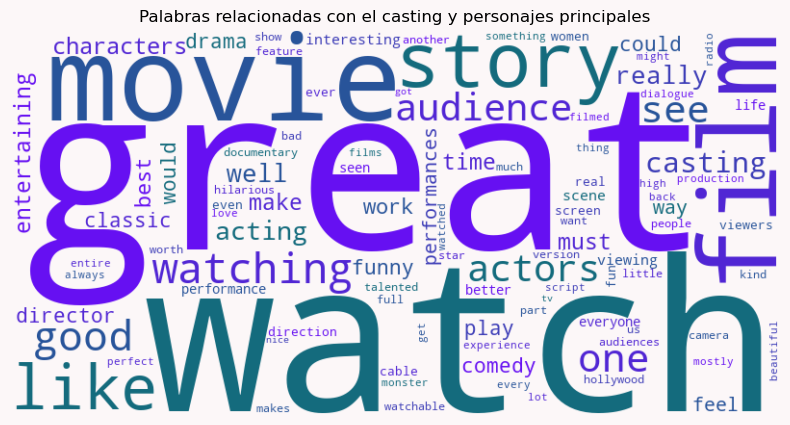

In [284]:
create_word_cloud(wc_cast, 'Palabras relacionadas con el casting y personajes principales')

In [214]:
print(analyze_topic('audience', 'casting and main character'))

**What reviewers value about casting and main characters:**
- Mention of brilliant and captivating cast
- Appreciation for nice story and cast
- Commendation on believable performances and characters
- Praise for great casting and soundtrack
- Recognition of fantastic performances from the cast
- Positive remarks on perfect casting for main characters
- Liked the young cast and their performances
- Approval of all-star cast and performances
- Comments on touching and emotional story with a great cast
- Excitement for a movie with a great cast
- Enjoyment of a classic movie with excellent casting
- Mention of the great chemistry and roles of the cast

**What reviewers criticize about casting and main characters:**
- Frustration with the change of cast in a sequel
- Disappointment with wasted potential of a great cast
- Criticism of underdeveloped characters
- Negative comments on bland and forgettable main characters
- Complaints of some actors' bad performances
- Dislike for main chara

In [215]:
print(analyze_topic('critics', 'casting and main character'))

**What reviewers value about casting and main characters:**

- Strong performances by the cast elevate the film.
- A captivating documentary showcasing the acting process during auditions.
- Priceless casting that any adult viewer can appreciate.
- Outstanding performances, especially in ensemble acting.
- Strong and credible characterizations by the actors.
- Talented juvenile cast that delivers delightful performances.
- Charismatic and big-screen friendly faces among the actors.
- Performers who make the characters their own.
- A stellar cast with great chemistry and performances.
- Lead actors who are praised for their intense, emotional, or captivating portrayals.

**What reviewers criticize about casting and main characters:**

- Script focus shifting among characters instead of developing them.
- Issues with casting choices and miscasting.
- Mediocre acting and performances.
- Characters feeling like archetypes rather than real people.
- Lack of compelling relationships or well-

In [216]:
print(analyze_topic_general('casting and main character'))

After performing text mining on the provided movie reviews, I have identified some common themes and differences in opinions between the critics and the general audience regarding casting and main characters in the movies. Here are the key findings:

**Similarities:**
1. **Praise for Strong Cast**: Both critics and the general audience appreciate movies with a strong cast. They acknowledge when the casting choices are well-done and when the actors deliver solid performances.
   
2. **Good Performances**: Both groups recognize and value good performances by the actors. They emphasize the importance of believable and powerful acting in making the characters and the movie engaging.

3. **Character Appreciation**: Both critics and the audience mention their appreciation for well-developed and interesting characters. They enjoy when the actors bring depth to the characters through their performances.

4. **Mention of Specific Performances**: Both groups highlight specific actors or characte

In [285]:
e.ra_fa.query('cast')

{'ids': [['m/all_about_the_benjamins/8',
   'm/nuts/0',
   'm/meet_the_blacks/3',
   'm/poms/10',
   'm/welcome_home_roscoe_jenkins/16',
   'm/down_periscope/21',
   'm/10005057-smile/11',
   'm/10005057-smile/4',
   'm/in_harms_way/7',
   'm/the_house_of_the_spirits/14']],
 'distances': None,
 'metadatas': None,
 'embeddings': None,
 'documents': [['all-star cast, all-star laughs',
   'unique and captivating, brilliant cast',
   'fantastic cast with actual moments to make you laugh',
   'felt a bit rushed, but great cast and production value. totally delivers. (and watching diane keaton shake it is always a hoot!)',
   'this is so funny gotta love the cast',
   'hilarious with a great cast!',
   'nice story and nice cast :)',
   'nice story and nice cast :)',
   'great cast.  entertaining flick!',
   'excellent cast and classic movie.']],
 'uris': None,
 'data': None}

In [286]:
e.rc_fc.query('cast')

{'ids': [['m/casting_about/2',
   'm/casting_about/8',
   'm/future_weather/3',
   'm/casting_about/9',
   'm/antz/33',
   'm/casting_about/0',
   'm/i_used_to_go_here/28',
   'm/1157387-little_fish/11',
   'm/elstree_1976/2',
   'm/hail_caesar_2016/16']],
 'distances': None,
 'metadatas': None,
 'embeddings': None,
 'documents': [["casting doesn't couch its message.",
   'casting about may be a definitive account of the cinematic audition process.',
   'smart casting redeems the film.',
   'the acting process is joyously celebrated in casting about, a captivating documentary shot entirely in audition rooms during the search for three thesps for a feature film.',
   'the casting is priceless and something any adult will appreciate.',
   'casting about is less a documentary than a lyrical tribute to women in general. strong women, confident women, nervous women, goofy women, beautiful women and just normal-looking women. this film adores them all.',
   "rey has a field day directing the

In [289]:
e.ra_fc.query('great cast but bad story')

{'ids': [['m/hunter_gatherer/1',
   'm/widows_peak/15',
   'm/the_levelling/4',
   'm/world_of_henry_orient/19',
   'm/good_neighbors_2011/21',
   'm/tightrope/0',
   'm/1028554-blue_steel/7',
   'm/object_of_beauty/9',
   'm/what_keeps_you_alive/7',
   'm/the_childhood_of_a_leader/17']],
 'distances': None,
 'metadatas': None,
 'embeddings': None,
 'documents': [['so much promise but bad acting and weak script',
   "all star cast, but with dialog so poor, they weren't given much to work with. the story had potential.",
   'great cast & good acting - but an unsatisfying ending and many loose ends.',
   'wonderful cast, interesting directing, but the story lacks actual entertainment value.',
   'horrible. the lead actress is horrible. the story is horrible. just horrible. this had potential to be good but fails big time.',
   'should have been better with this cast.',
   'the over the top story is just beyond belief and despite a great cast? it just fails to deliver.',
   'wasted a grea

In [290]:
e.rc_fa.query('great cast but bad story')

{'ids': [['m/the_kitchen/21',
   'm/marilyn_hotchkiss_ballroom_dancing_and_charm_school/27',
   'm/1092437-in_too_deep/11',
   'm/other_sister/9',
   'm/welcome_home_roscoe_jenkins/2',
   'm/the_last_full_measure/11',
   'm/robin_hood_men_in_tights/11',
   'm/life_as_a_house/10',
   'm/seven_days_in_utopia_2011/16',
   'm/an_acceptable_loss/29']],
 'distances': None,
 'metadatas': None,
 'embeddings': None,
 'documents': [['great cast, awful film.',
   'good performances, good actors. kind of a terrible story.',
   'consistent bad acting.',
   'it has all the right cast members...but it cripples them with the screenplay.',
   "good cast can't save stereotype-laden comedy.",
   'a lethargic, preachy, maudlin and clunky mess despite a fine cast.',
   'an impressive cast cannot unfortunately save the day.',
   "its one redeeming quality is a stellar cast that struggles mightily to overcome a turgid screenplay -- unfortunately, they don't succeed.",
   'great actors and good messages, but 

In [295]:
e.ra_fa.query('actor')

{'ids': [['m/paid_in_full/25',
   'm/bloodshot_2020/9',
   'm/man_apart/15',
   'm/covenant/21',
   'm/1157247-london/19',
   'm/1062483-bad_boys/15',
   'm/grown_ups/0',
   'm/romeo_is_bleeding/19',
   'm/bloodshot_2020/19',
   'm/act_of_valor/13']],
 'distances': None,
 'metadatas': None,
 'embeddings': None,
 'documents': [['good actors  in this movie',
   'diesel proves he can actually act while actioning.',
   'vin diesel shows how good an actor he really is',
   'sexy actors. loved the story',
   'pure acting. deal with it.',
   'action funny but more action',
   'good comedic acting.',
   "very underrated in my opinion if you ask. actors, story and operator do the thing. it's paranoiac and you can be part of it. and enjoy.",
   'action packed very well filmed  exciting all the way through vin diesel  is the man .✊✊🤛👊👍',
   'not the best acting but the actors (gasp) are not "actors!" they\'re professional special teams operators so you\'re going to see some awesome action by real

In [297]:
e.rc_fa.query('actor')

{'ids': [['m/man_apart/6',
   'm/1157247-london/2',
   'm/freebie_and_the_bean/18',
   'm/foolish/10',
   'm/bloodshot_2020/11',
   'm/stick_it/9',
   'm/lot_like_love/7',
   'm/dirty_love/26',
   'm/man_apart/19',
   'm/the_air_i_breahe/11']],
 'distances': None,
 'metadatas': None,
 'embeddings': None,
 'documents': [["vin diesel has to make a choice whether he's going to be an actor or a cookie cutter action star.",
   'an acting exercise (and not a very interesting one) disguised as a film.',
   "it has a cast of otherwise good actors doing bits of business (sometimes called acting) as if they thought they could upstage all of the movie's automobiles, which are seldom still.",
   'what would inspire someone who cannot write or act to pen and star in a movie?',
   "as the center of the story and as the titular superhero, [vin] diesel's acting is almost as artificially lifeless as ray garrison/bloodshot.",
   "for a film whose characters value authenticity and natural talent, it's ir

# Topic #3: True stories

In [234]:
wc_true = wc_for_topic('true stories')
wc_true

{'story': 289,
 'good': 55,
 'stories': 42,
 'tale': 42,
 'true': 40,
 'one': 35,
 'told': 31,
 'life': 30,
 'real': 28,
 'love': 25,
 'great': 24,
 'like': 22,
 'people': 20,
 'movie': 19,
 'telling': 19,
 'film': 16,
 'better': 15,
 'based': 13,
 'sad': 13,
 'touching': 13,
 'two': 13,
 'drama': 12,
 'amazing': 12,
 'family': 12,
 'bit': 12,
 'characters': 11,
 'much': 11,
 'really': 11,
 'storytelling': 11,
 'interesting': 11,
 'pretty': 11,
 'acting': 10,
 'way': 10,
 'could': 10,
 'tell': 10,
 'inspiring': 9,
 'well': 9,
 'funny': 9,
 'enough': 9,
 'made': 9,
 'even': 9,
 'ending': 9,
 'us': 9,
 'time': 9,
 'bad': 9,
 'movies': 8,
 'inspirational': 8,
 'powerful': 8,
 'truth': 8,
 'need': 8,
 'makes': 8,
 'never': 8,
 'feel': 8,
 'simple': 8,
 'though': 7,
 'human': 7,
 'redemption': 7,
 'beautiful': 7,
 'many': 7,
 'history': 7,
 'beyond': 7,
 'get': 7,
 'end': 7,
 'quite': 7,
 'something': 7,
 'another': 7,
 'make': 6,
 'best': 6,
 'entertaining': 6,
 'uplifting': 6,
 'moving': 

In [235]:
del wc_true['story']
del wc_true['stories']

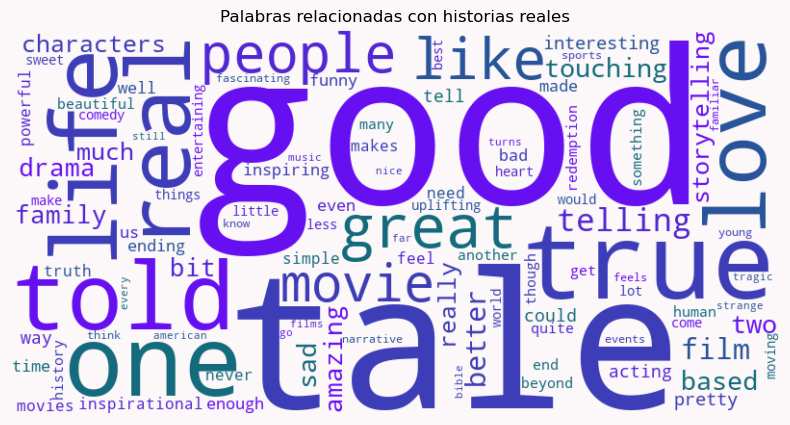

In [299]:
create_word_cloud(wc_true, 'Palabras relacionadas con historias reales')

In [227]:
print(analyze_topic('critics', 'true stories'))

**What the reviewers value about true stories:**

- Revel in the real-life aspects and find them tantalizing and fascinating.
- Appreciate the need for telling these stories to remember the past and recognize the complexity of history.
- Value stories of redemption, survival, forgiveness, acceptance, and moving forward.
- Enjoy uplifting underdog stories and tales of flawed heroes.
- Find the stories touching, affecting, and resonant.
- Appreciate stories that remind viewers of real people's experiences.
- Enjoy stories with unexpected twists, good acting, and thrilling action scenes.

**What the reviewers criticize about true stories:**

- Criticize Hollywood's tendency to simplify and sanitize real-life complexities.
- Dislike when stories lack originality or are crafted with clichés.
- Criticize over-sentimentality, over-reliance on melodrama, and lack of human elements in stories.
- Disapprove of films that don't do justice to the real-life stories they are based on.
- Dislike when

In [226]:
print(analyze_topic('audience', 'true stories'))

**What reviewers value about true stories:**
- Heart-warming and inspirational stories based on true events
- Emotional and touching storytelling
- Stories that are meaningful and uplifting
- Inspiring tales of courage, love, and perseverance
- Unique and captivating storytelling

**What reviewers criticize about true stories:**
- Some stories lack intensity or are lacking in certain aspects
- Unrealistic or not credible portrayals in some stories
- Some stories are considered boring or lacking in excitement
- Flat acting in some cases
- Stories that are deemed immoral, cruel, or depressing


In [228]:
print(analyze_topic_general('true stories'))

Based on the reviews provided, here are some similarities and differences between the opinions of certified critics and the general audience regarding true story movies:

### Similarities:
1. **Emotional Impact**: Both critics and the audience appreciate the emotional impact of the stories. They mention touching, heartwarming, sad, and inspiring elements in the reviews.
  
2. **Importance of Story**: Both groups emphasize the importance of storytelling in conveying real-life events. They acknowledge the significance of sharing these stories with the world.

3. **Authenticity**: Critics and the audience both mention the authenticity of the stories. They appreciate when the real-life aspects are well presented and acted upon.

4. **Quality of Acting**: Both critics and the audience comment on the quality of acting in the movies. They mention good performances and effective portrayals by the actors.

### Differences:
1. **Depth of Analysis**: Critics tend to provide a more detailed analys

In [305]:
e.rc_fc.query('cruel true story')

{'ids': [['m/girl_model/25',
   'm/a_gray_state/10',
   'm/harpoon_2019/8',
   'm/a_gray_state/13',
   'm/the_mercy/20',
   'm/what_keeps_you_alive/16',
   'm/open_water/21',
   'm/leap_year_2011/11',
   'm/time_share_2018/13',
   'm/the_heart_machine/3']],
 'distances': None,
 'metadatas': None,
 'embeddings': None,
 'documents': [['a tragic story of exploitation and human indifference...',
   'a story similar to "the shining" but much scarier because it is true.',
   'this is a cruel story of people of adrift at sea with no moral compass and i loved it.',
   'a tantalising and fascinating real-life story.',
   'the mercy is the tragic true story of donald crowhurst. his pursuit of a dream led to a rabbit hole of deception and dire consequences.',
   'a simultaneously terrifying and (intentionally?) humorous tale of betrayal.',
   'harrowing.',
   'quiet, heartbreaking',
   'time share...is a horror story come to life',
   'a disturbing love story set in the unforgiving world of the i

In [308]:
e.ra_fa.query('true story melodramatic')

{'ids': [['m/the_longest_ride/22',
   'm/i_still_believe/5',
   'm/1003854-champ/6',
   'm/for_greater_glory/7',
   'm/spitfire_grill/23',
   'm/till_human_voices_wake_us/17',
   'm/the_choice/22',
   'm/the_promise_2017/29',
   'm/after_2019/20',
   'm/friday_after_next/17']],
 'distances': None,
 'metadatas': None,
 'embeddings': None,
 'documents': [['fabulous love story and weepy',
   'touching , sad true story! ',
   'a gripping melodrama and a truly tearjerker in cinematic sport.',
   'excellent story and acting based on real life',
   "meaningful story that doesn't overdo the drama at all, though very touching. ultimately uplifting.",
   'a touching romantic ghost story.',
   'good story, good ending but not realistic. ',
   'a story that had to be told. a very sad story told in a very entertaining way.',
   'a very good love story',
   'classic christmas story']],
 'uris': None,
 'data': None}

In [309]:
e.rc_fa.query('true story melodramatic')

{'ids': [['m/how_to_deal/21',
   'm/sleeping_with_the_enemy/0',
   'm/gospel/19',
   'm/how_to_deal/20',
   'm/stay/0',
   'm/love_the_hard_way/5',
   'm/1114051-enough/15',
   'm/my_way_2012/3',
   'm/daddys_little_girls/11',
   'm/i_still_believe/7']],
 'distances': None,
 'metadatas': None,
 'embeddings': None,
 'documents': [['very melodramatic.',
   'a melodramatic showdown...',
   'a heartfelt but muddled melodrama.',
   'a muddled mess of melodrama.',
   'a sappy melodrama touted in a supernatural angle...',
   'heartfelt but fatally overwrought romantic melodrama.',
   'despite a story that starts off convincingly, this movie turns into melodramatic, revenge-crazy hollywood mush.',
   '... compromised by a script that relies on melodrama and hollywood clichs.',
   'the movie reaches the heights of melodrama with narrative cliches that border on the surreal.',
   "a true story that's crafted as a compilation of well-worn cinematic clichés and melodramatic beats, but it's offered

In [311]:
e.ra_fc.query('true story boring')

{'ids': [['m/certain_women_2016/23',
   'm/resistance_2011/21',
   'm/the_family_fang/14',
   'm/errors_of_the_human_body/5',
   'm/the_land_of_steady_habits/16',
   'm/patrick_evil_awakens/20',
   'm/i_used_to_be_darker_2013/2',
   'm/swing_shift/22',
   'm/magic_magic_2013/13',
   'm/errors_of_the_human_body/13']],
 'distances': None,
 'metadatas': None,
 'embeddings': None,
 'documents': [['totally boring story about uninteresting people.',
   'boring and fictitious',
   'nothing special, the story is a bit dull',
   'unbelievably boring.',
   'boring and pointless',
   'fantastic story but it gets dull overtime.',
   'boring as hell, with souless characthers and a solid story.',
   "pretty boring. the drama wasn't really that dramatic.",
   'just weird horrible and boring',
   "well acted, and interesting story, but ultimately it doesn't gel, and is boring"]],
 'uris': None,
 'data': None}

# Draft

In [48]:
print(analyze_topic('critics', 'horror movies'))

- **Positive aspects:**
   - Expertly modulated horror
   - Variety of chilling tales
   - Revival of character-driven horror
   - New ideas within traditional tropes
   - Standout anthology with diverse tales
   - Sophisticated and intelligent horror
   - Effective mix of horror and humor
   - Well-played horror comedy
   
- **Critiques:**
   - Overuse of jump scares
   - Gruesome for shock value
   - Clichéd horror elements
   - Lacks originality and scares
   - Gratuitous violence undermines suspense
   - Sloppy and dumb action/horror hybrids
   - Forgettable and unoriginal horror clichés
   - Disappointing mix of horror and comedy


In [74]:
print(analyze_topic('audience', 'cast'))

**What reviewers value about the cast:**
- All-star cast praised for delivering laughs and captivating performances
- Specific actors received praise for their great performances
- Cast was appreciated for bringing life to the characters and making the story engaging
- Cast members were commended for their entertaining and funny portrayal of roles
- Cast selection was deemed perfect for the movie, with actors at their best
- Cast portrayed a mix of comedy, drama, and tragedy effectively
- The ensemble cast was highlighted for their chemistry and engaging performances

**What reviewers criticize about the cast:**
- Some movies were criticized for wasting a great cast on a lackluster plot or poor dialogues
- Certain performances were noted to be subpar or lacking in quality
- Movies were described as forgettable or unwatchable despite the presence of a strong cast
- In some cases, reviewers felt the cast was stranded in weak or messy storytelling
- Criticism was directed towards movies w

In [73]:
print(analyze_topic('critics', 'cast'))

**Positive Aspects of Cast in Movie Reviews:**
- Appreciation for well chosen and talented cast members
- Recognition of strong performances and chemistry among the cast
- Praise for casting choices that enhance the storytelling and bring out the best in the characters
- Commendation for authentic and diverse representation of different individuals in the cast
- Highlighting the skillful direction provided to the cast to deliver compelling performances
- Acknowledgment of exceptional acting and dedicated performances that elevate the film

**Criticism of Cast in Movie Reviews:**
- Critique of miscasting or poor casting choices that detract from the film
- Disappointment in lackluster performances or overacting by cast members
- Mention of unprofessional acting from non-professional actors
- Criticism of films leaning heavily on the star power of the cast rather than the storyline
- Frustration with cast members overshadowing the narrative or becoming distractions
- Complaints about cas

Audience:
* Values the presence of specific actors and stars.

Critics:
* Are not fooled by the inclusion of stars if the storyline is not good.

Both:
* Value a good cast.
* Get a feel for when the storyline is not good. 

In [14]:
e.rc_fa.query('vin diesel')

{'ids': [['m/man_apart/26',
   'm/man_apart/6',
   'm/bloodshot_2020/9',
   'm/man_apart/16',
   'm/fast_and_furious/19',
   'm/man_apart/22',
   'm/man_apart/1',
   'm/man_apart/31',
   'm/bloodshot_2020/11',
   'm/man_apart/5']],
 'distances': None,
 'metadatas': None,
 'embeddings': None,
 'documents': [["vin diesel doesn't have the horsepower to get this stalled mass of cliches going.",
   "vin diesel has to make a choice whether he's going to be an actor or a cookie cutter action star.",
   "vin diesel's valiant comics superhero can't transcend the marvel-dc bipartisanship.",
   'the film would be totally unwatchable without the very real charisma of diesel.',
   'with his sleepy-eyed gaze and biceps that no shirt can contain, diesel quietly commands the movie.',
   "once thoughts of revenge fill the head of diesel's sean vetter, the direction of the story unfortunately goes south.",
   "if i hadn't seen traffic, this would still stink, but i wouldn't know how badly. diesel runs o

In [12]:
e.ra_fa.query('vin diesel')

{'ids': [['m/man_apart/15',
   'm/bloodshot_2020/21',
   'm/bloodshot_2020/14',
   'm/bloodshot_2020/9',
   'm/bloodshot_2020/1',
   'm/man_apart/2',
   'm/bloodshot_2020/19',
   'm/bloodshot_2020/12',
   'm/man_apart/17',
   'm/bloodshot_2020/13']],
 'distances': None,
 'metadatas': None,
 'embeddings': None,
 'documents': [['vin diesel shows how good an actor he really is',
   'vin diesel, not much to say about this bus fuck of a man. holy fuck. elite specimen of a human being. the guy that got dropkicked got sent out of the space time continuum. vin "fuckass" diesel stars in this superhero adventure. batman or spider-man have nothing on the greatest superhero of all time. bloodshot could take thanos and darkseid on at the same time in a 1v2. vin doesn\'t disappoint and delivers another banger that slaps my titties into next week. cinema',
   'vin diesel(mark sinclair) is a great in action hero and bloodshot in 4k bodes a forewarning -- which may come sooner than most would expect --

In [75]:
print(analyze_topic('critics', 'horror movies'))

**What reviewers value about horror movies:**
- Skillful modulation of horror elements
- Incorporation of innovative and unique ideas
- Emphasis on character development and setting over shock value
- Variety in storytelling and themes to cater to different horror fans
- Exploration of dark and chilling tales
- Effective twist on traditional horror tropes
- Intelligent twists on genre conventions
- Sophisticated and intelligent storytelling
- Strong sound design and special effects
- Unique and diverse tales of terror
- Fusion of horror with other genres like comedy or action
- Skillful combination of tension, scares, and humor

**What reviewers criticize about horror movies:**
- Overuse of jump scares and loud noises
- Gratuitous violence and torture
- Lack of originality or creativity in storytelling
- Repetitive or predictable horror gags
- Excessive gore and brutality without substance
- Poor execution in combining horror with other genres
- Lack of scares or thrills
- Misuse of tr

In [76]:
print(analyze_topic('audience', 'horror movies'))

**What reviewers value about horror movies:**
- Impending sense of dread
- Good suspense and tension
- Mix of horror and action elements
- Nostalgia for classic horror movies
- Unique and twisted plotlines
- Creepy atmosphere and scary villains
- Humor mixed with horror
- Special effects and visual appeal
- Good character development
- References to classic horror films

**What reviewers criticize about horror movies:**
- Overreliance on jumpscares
- Unoriginal or predictable plots
- Lack of genuine scares
- Poor acting or uninteresting characters
- Inconsistent tone or atmosphere
- Mislabeling of genres
- Lack of creativity in storytelling
- Excessive gore or disturbing content
- Not staying true to traditional horror elements


In [77]:
print(analyze_topic('audience', 'romance'))

**Values highlighted by the reviewers:**
- Appreciation for romantic and comedy aspects in movies
- Enjoyment of sweet and heartwarming romantic stories
- Positive comments on chemistry between characters
- Recognition of movies with happy or satisfying endings
- Praise for good acting performances
- Fondness for unconventional or unique romantic comedies
- Enjoyment of romantic movies that evoke emotions like laughter, tears, or warmth

**Critiques provided by the reviewers:**
- Criticism on clichéd or predictable romantic storylines
- Disappointment in lack of character development or depth
- Negative comments on lack of realism or believability in relationships
- Some reviews found certain movies too cheesy or too light in content
- Complaints about abrupt or unsatisfactory endings
- Critiques about slow pacing or lack of engaging plot development


In [78]:
print(analyze_topic('critics', 'romance'))

**What reviewers value about romance:**
- Smart and witty dialogues in romantic comedies
- Exploration of important relationships beyond just superficial love stories
- Realistic portrayal of romance and intimate relationships
- Tender and heartwarming love stories
- Complexity and depth in romantic thrillers
- Unconventional and unique take on romance
- Thought-provoking themes intertwined with romance
- Interplay between romance and other genres like drama, fantasy, satire, and thriller
- Beautiful cinematography and visual aesthetics in romantic films
- Challenging or subverting social norms related to romance

**What reviewers criticize about romance:**
- Predictability and clichés in romantic storylines
- Overemphasis on cheesy or melodramatic elements
- Lack of originality in plotlines or character development
- Mixing up sex with true romance
- Excessive sentimentality or schmaltziness in romantic dramas
- Unrealistic or idealized portrayals of love and relationships


In [79]:
print(analyze_topic('audience', 'ending'))

- **What the reviewers value about the ending:**
  - Surprise twists and unexpected resolutions are praised.
  - Emotional endings that leave an impact are appreciated.
  - Endings that tie up the story nicely and bring everything together are well-received.
  - Happy endings are favored by some reviewers.
  - Memorable endings that make the movie stand out positively.
  - Endings with great meaning or powerful messages receive praise.
  
- **What the reviewers criticize about the ending:**
  - Abrupt or rushed endings are negatively commented on.
  - Open or inconclusive endings are seen as unsatisfactory.
  - Endings that lack closure or leave loose ends are frustrating to some reviewers.
  - Some reviewers dislike when the ending is too predictable.
  - Anticlimactic endings lead to disappointment.
  - Endings that feel like a sudden stop or lack proper development are criticized.


In [80]:
print(analyze_topic('critics', 'ending'))

**Positive Aspects:**
- Reviewers appreciate unexpected and charming endings.
- Some reviewers value clarity in the final scenes.
- Endings that prioritize the journey over a neat conclusion are seen positively.
- Cinematography, outstanding acting, and well-paced storytelling are highlighted.
- Endings that leave room for interpretation and contemplation are praised.
- Emotional resonance, hope, and unique visions in endings are valued.

**Critiques:**
- Some reviewers found endings too unresolved or frustrating.
- Rapid or forced conclusions are criticized.
- Endings that lack closure or fail to live up to the rest of the film are mentioned.
- Overuse of cliches, predictability, and unsatisfying twists are pointed out as negatives.
- Endings that feel cheap, melodramatic, or manipulative are disliked.
- Rushed or hastily resolved conclusions are criticized.


In [81]:
print(analyze_topic('critics', 'true stories'))

**What the reviewers value about true stories:**
- Real-life stories are seen as fascinating and tantalizing.
- Reviewers appreciate when true stories highlight the complexities of history and human nature.
- Stories of resilience, survival, redemption, and forgiveness are valued.
- Authenticity and sensitivity in storytelling are praised.
- Reviewers appreciate true stories that touch upon universal themes and issues that can resonate with diverse audiences.
- The human element in stories, along with themes of heroism and making meaningful connections, is highly regarded.

**What the reviewers criticize about true stories:**
- Lack of originality and depth in storytelling is criticized.
- Overly sentimental or melodramatic storytelling is noted negatively.
- Some reviewers point out when true stories are portrayed in a clichéd or one-dimensional manner.
- The use of clichés, predictability, and lack of creativity in storytelling is criticized.
- Reviewers are critical of stories that 

In [82]:
print(analyze_topic('audience', 'true stories'))

**Positive Aspects:**
- Reviewers value heart-warming and inspirational true stories.
- Appreciation for stories based on real events and real-life individuals.
- Positive comments on touching and uplifting stories.
- Praise for stories with themes of forgiveness, redemption, and perseverance.
- Recognition of well-presented and captivating storytelling.
- Support for stories that offer inspiration, hope, and meaningful messages.

**Critiques:**
- Some reviewers find certain stories to be lacking intensity or originality.
- Criticism of stories that are boring, dull, or lacking excitement.
- Negative feedback on stories that are sad, disturbing, or depressing.
- Mixed opinions on the balance between realism and entertainment in some stories.
- Comments on certain stories being impractical, immoral, or cruel.
- Some reviewers express disappointment with the script or storytelling execution in certain stories.


Critics:
* Highlight the complexities of human nature, even when it means sad stories.
* Sentimental or melodramatic is negative.
* Clichés are bad.

Audience:
* Value heart-warming and inspirational true stories.
* Positive on touching / uplifting stories.
* Lack of intensity is bad (boring)
* Negative feedback on bad stories.

In [25]:
e.ra_fc.query('sad true story')

{'ids': [['m/price_check_2011/22',
   'm/strong_island/6',
   'm/stop_loss/0',
   'm/manxman/3',
   'm/it_felt_like_love_2013/0',
   'm/bound_by_flesh_2012/0',
   'm/little_woods/2',
   'm/the_final_year/19',
   'm/winter_kills/1',
   'm/certain_women_2016/23']],
 'distances': None,
 'metadatas': None,
 'embeddings': None,
 'documents': [['kind of a sad weird tale',
   'a really sad story and very infuriating.',
   'sad, sad story of ptsd war drama...',
   'quite immoral and cruel story.',
   'sad story of a girl from an abusive family continuing to have her soul crushed by shitty teen behavior and a traumatic experience that will scar her for life. not a hint of empowerment, not the best storyline.',
   'how sad, they lived such a sad life, abused and never truly loved or cared for much as children',
   'a very dark depressing realistic story of two sisters who are struggling with making their lives better in the midst of a poverty stricken town.',
   'pathetic and fake story no one c

In [66]:
encoding = tiktoken.encoding_for_model('gpt-3.5-turbo-0125')
tot = 0
for a in x:
    tot += len(encoding.encode(a))
print(tot)

1850
